## Chapter 7. Mathematical Morphology
可以透過數學型態學運算修飾目標物件的外型。常用的數學型態學運算運算有:
+ dilate: 
+ erode: 
+ opening: 
+ closing:
+ white top-hat
+ black top-hat
+ morphology gradient

### Dilation與Erosion
dilate膨脹目標區(通常是非0像素); erode侵蝕目標區(通常是0像素)

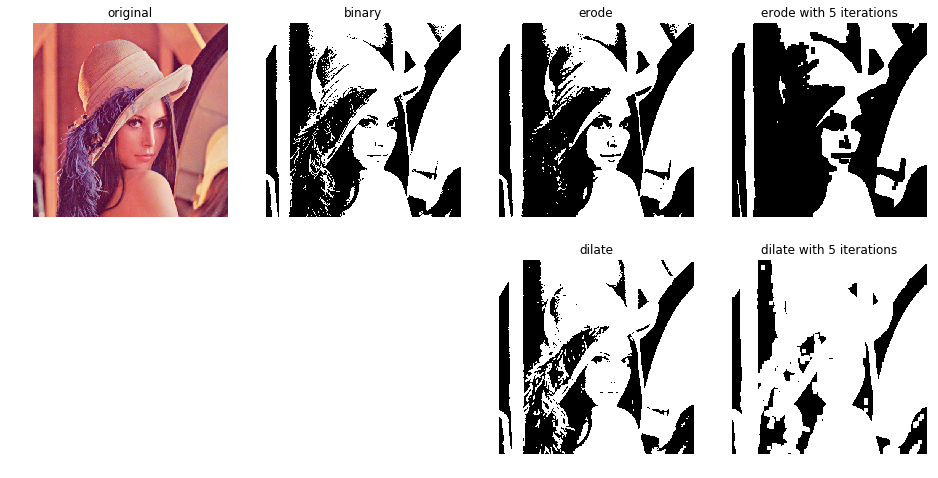

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('./test_data/lenna.png')
gray  = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
thr, binary = cv2.threshold(gray,140,255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)

# original image
plt.figure(figsize=(16,8))
plt.subplot(2,4,1)
plt.imshow(image[:,:,[2,1,0]])
plt.title('original')
plt.axis('off')

# the image after thresolding
plt.subplot(2,4,2)
plt.imshow(binary,cmap='gray')
plt.title('binary')
plt.axis('off')

# erosion with one iteration
plt.subplot(2,4,3)
plt.imshow(cv2.erode(binary,None,iterations=1),cmap='gray')
plt.title('erode')
plt.axis('off')

# erosion with 5 iterations
plt.subplot(2,4,4)
plt.imshow(cv2.erode(binary,None,iterations=5),cmap='gray')
plt.title('erode with 5 iterations')
plt.axis('off')

# dilation with 1 iteration
plt.subplot(2,4,7)
plt.imshow(cv2.dilate(binary,None,iterations=1),cmap='gray')
plt.title('dilate')
plt.axis('off')

# dilation with 5 iterations
plt.subplot(2,4,8)
plt.imshow(cv2.dilate(binary,None,iterations=5),cmap='gray')
plt.title('dilate with 5 iterations')
plt.axis('off')
plt.show()

我們可以設計不同的kernel(structuring elements)來做數學形態學計算。

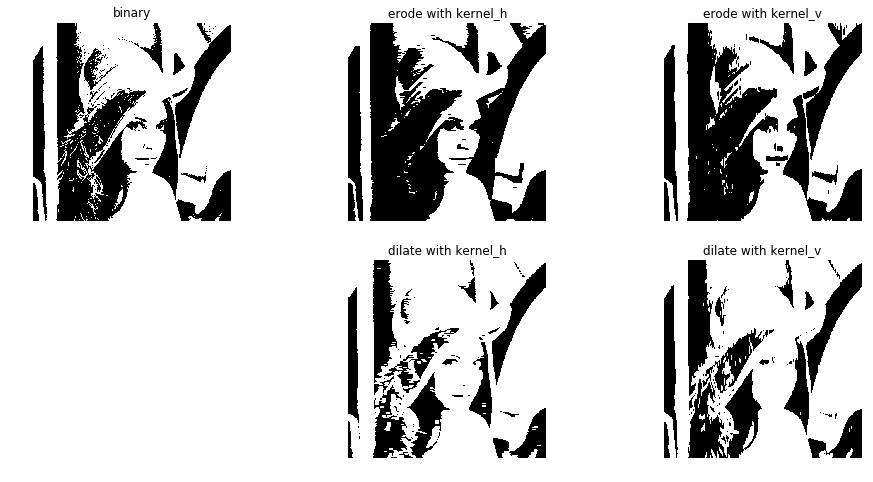

In [2]:
kernel_h= np.ones((1,5),np.uint8)
kernel_v= np.ones((5,1),np.uint8)

plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.imshow(binary,cmap='gray')
plt.title('binary')
plt.axis('off')

plt.subplot(2,3,2)
plt.imshow(cv2.erode(binary,kernel_h,iterations=2),cmap='gray')
plt.title('erode with kernel_h')
plt.axis('off')

plt.subplot(2,3,3)
plt.imshow(cv2.erode(binary,kernel_v,iterations=2),cmap='gray')
plt.title('erode with kernel_v')
plt.axis('off')

plt.subplot(2,3,5)
plt.imshow(cv2.dilate(binary,kernel_h,iterations=2),cmap='gray')
plt.title('dilate with kernel_h')
plt.axis('off')

plt.subplot(2,3,6)
plt.imshow(cv2.dilate(binary,kernel_v,iterations=2),cmap='gray')
plt.title('dilate with kernel_v')
plt.axis('off')
plt.show()

### Opening與Closing
closing與opening可用來修飾外型。closing會將小凹洞等補實，opening將會打斷藕斷絲連的地方。選擇closing或opening修飾外型，可視將保留比原本大(closing)或小(opening)的區域來決定。

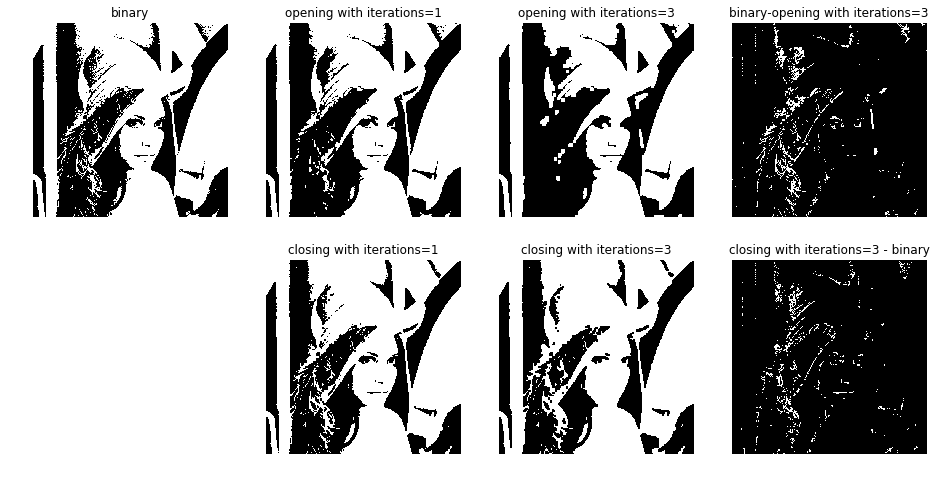

In [3]:
plt.figure(figsize=(16,8))
plt.subplot(2,4,1)
plt.imshow(binary,cmap='gray')
plt.title('binary')
plt.axis('off')

plt.subplot(2,4,2)
plt.imshow(cv2.morphologyEx(binary,cv2.MORPH_OPEN,None,iterations=1),cmap='gray')
plt.title('opening with iterations=1')
plt.axis('off')

plt.subplot(2,4,3)
# iterations = 3 does not mean that opening is applied 3 times.
plt.imshow(cv2.morphologyEx(binary,cv2.MORPH_OPEN,None,iterations=3),cmap='gray')
plt.title('opening with iterations=3')
plt.axis('off')

plt.subplot(2,4,4)
# iterations = 3 does not mean that opening is applied 3 times.
plt.imshow(binary-cv2.morphologyEx(binary,cv2.MORPH_OPEN,None,iterations=3),cmap='gray')
plt.title('binary-opening with iterations=3')
plt.axis('off')


plt.subplot(2,4,6)
plt.imshow(cv2.morphologyEx(binary,cv2.MORPH_CLOSE,None,iterations=1),cmap='gray')
plt.title('closing with iterations=1')
plt.axis('off')

plt.subplot(2,4,7)
plt.imshow(cv2.morphologyEx(binary,cv2.MORPH_CLOSE,None,iterations=2),cmap='gray')
plt.title('closing with iterations=3')
plt.axis('off')

plt.subplot(2,4,8)
plt.imshow(cv2.morphologyEx(binary,cv2.MORPH_CLOSE,None,iterations=2)-binary,cmap='gray')
plt.title('closing with iterations=3 - binary')
plt.axis('off')
plt.show()

### Gray-scale morphology operation
數學型態學運算也可以應用到灰階或彩色影像上。

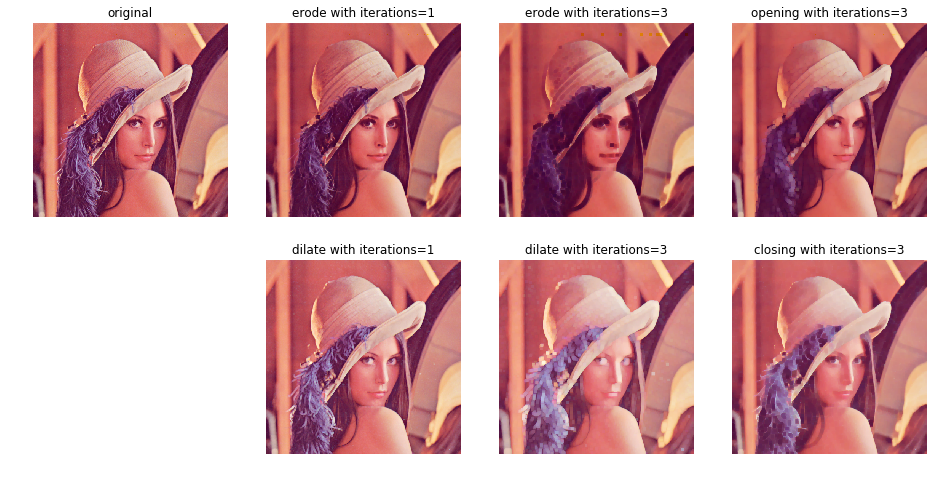

In [4]:
plt.figure(figsize=(16,8))
plt.subplot(2,4,1)
plt.imshow(image[:,:,[2,1,0]])
plt.title('original')
plt.axis('off')

plt.subplot(2,4,2)
plt.imshow(cv2.erode(image,None,iterations=1)[:,:,[2,1,0]])
plt.title('erode with iterations=1')
plt.axis('off')

plt.subplot(2,4,3)
plt.imshow(cv2.erode(image,None,iterations=3)[:,:,[2,1,0]])
plt.title('erode with iterations=3')
plt.axis('off')

plt.subplot(2,4,4)
plt.imshow(cv2.morphologyEx(image,cv2.MORPH_OPEN,None,iterations=3)[:,:,[2,1,0]])
plt.title('opening with iterations=3')
plt.axis('off')


plt.subplot(2,4,6)
plt.imshow(cv2.dilate(image,None,iterations=1)[:,:,[2,1,0]])
plt.title('dilate with iterations=1')
plt.axis('off')

plt.subplot(2,4,7)
plt.imshow(cv2.dilate(image,None,iterations=3)[:,:,[2,1,0]])
plt.title('dilate with iterations=3')
plt.axis('off')

plt.subplot(2,4,8)
plt.imshow(cv2.morphologyEx(image,cv2.MORPH_CLOSE,None,iterations=3)[:,:,[2,1,0]])
plt.title('closing with iterations=3')
plt.axis('off')

plt.show()

### Useful mathematical morphology operations
可以使用下面3個數學型態學運算計算影像特徵。
+ white top-hat operator: 找小亮帶或亮點
+ black top-hat operator: 找小暗帶或暗點
+ morphological gradient

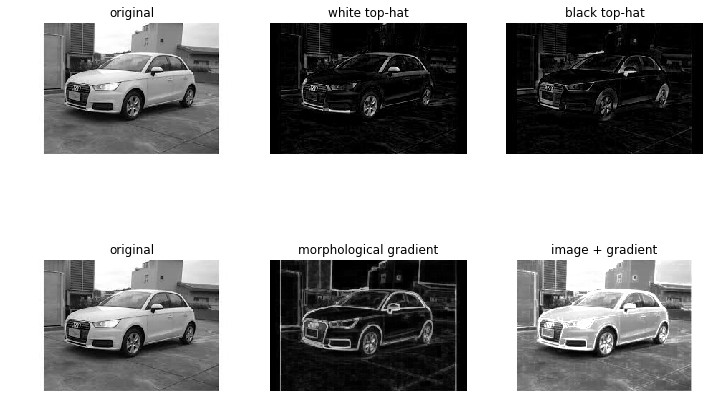

In [5]:
image = cv2.imread('./test_data/car.jpg')
gray  = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(12,8))
plt.subplot(2,3,1)
plt.imshow(gray,cmap='gray')
plt.title('original')
plt.axis('off')

plt.subplot(2,3,2)
plt.imshow(cv2.morphologyEx(gray,cv2.MORPH_TOPHAT,None,iterations=3),cmap='gray')
plt.title('white top-hat')
plt.axis('off')

plt.subplot(2,3,3)
plt.imshow(cv2.morphologyEx(gray,cv2.MORPH_BLACKHAT,None,iterations=3),cmap='gray')
plt.title('black top-hat')
plt.axis('off')


plt.subplot(2,3,4)
plt.imshow(gray,cmap='gray')
plt.title('original')
plt.axis('off')

plt.subplot(2,3,5)
plt.imshow(cv2.morphologyEx(gray,cv2.MORPH_GRADIENT,None,iterations=1),cmap='gray')
plt.title('morphological gradient')
plt.axis('off')

plt.subplot(2,3,6)
igray = gray.astype(np.int)
igray = igray+cv2.morphologyEx(gray,cv2.MORPH_GRADIENT,None).astype(np.int)
igray[igray>=255]=255
igray[igray<0]=0
plt.imshow(igray.astype(np.uint8),cmap='gray')
plt.title('image + gradient')
plt.axis('off')

plt.show()